#   <font color="#003d2e">Explorando o mercado agrícola de Karnataka com Folium </font> 

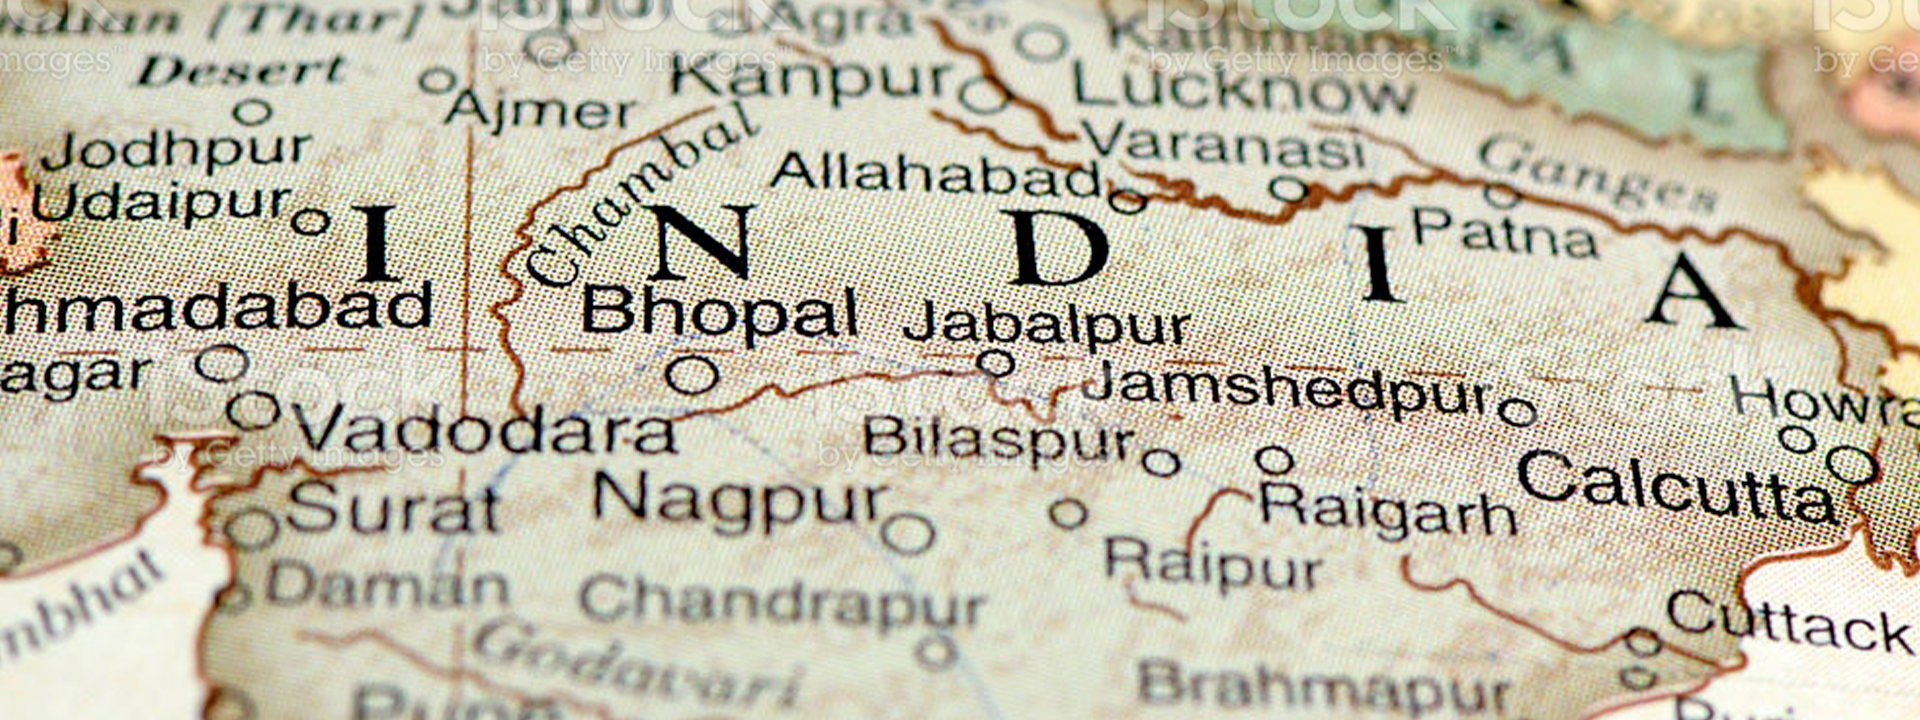

#   <font color="#00664d">Contexto </font> 

Neste notebook, exploraremos o dataset contendo os dados do mercado agrícola de **Karnataka** na Índia durante o ano de 2012. O conjunto de dados contém dados mensais de chegada de commodities do mercado agrícola do estado de Karnataka de todos os APMCs (Comitê de Mercado de Produtos Agrícolas) para o ano de 2012, como já mencionado. Portanto, tentaremos visualizar diferentes aspectos desse dataset com o auxílio da poderosíssima biblioteca **Folium**, largamente utilizada para visualização de **mapas interativos**, gerar **mapas coropléticos**, criar **marcadores** e etc.

##   <font color="#00664d">Leitura dos Dados </font> 

In [ ]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import folium

In [ ]:
#Importando a base de dados
df = pd.read_excel("CommMktArrivals2012.xls")

In [ ]:
#Exibindo as 5 primeiras linhas do dataframe
df.head()

In [ ]:
#Exibindo as colunas do dataframe
df.columns

In [ ]:
#Exibindo os tipos de dados
df.info()

In [ ]:
#Exibindo a quantidade de linhas e colunas
row, column = df.shape
print(f'O dataset possui {row} linhas e {column} colunas.')

Após importar nossa base de dados, podemos observar que esse dataset contém um tamanho razoável, contando com **21422** linhas e **10** colunas. Irei renomear as colunas para melhor entendimento da base de dados.

In [ ]:

df.rename(columns={'District Name':'Distrito', 'Taluk Name':'Nome_Taluk','Market Name':'Mercado', 'Address':'Endereco', 'Telephone':'Telefone', 'Commodity':'Produto', 'Year':'Ano', 'Month':'Mes', 'Arrival':'Chegada', 'Unit':'Unidade'}, inplace=True)

In [ ]:
df.sample(6)

##   <font color="#00664d">Preparação dos Dados </font> 

In [ ]:
# Filtrando os dados
df1 = df.groupby(['Produto', 'Distrito', 'Unidade'], as_index=False)
df1 = df1.sum().filter(["Produto", "Distrito", "Chegada", "Unidade"])
df_quintal = df1.query("Unidade == 'Quintal   '")
df_quintal.head()

Existem **156** commodities na base de dados. Iremos filtrar os dados e consideraremos apenas as commodities cujas unidades estão em **Quintal**, de modo que as outras commodities como côco e gado ficarão de fora de nossa exploração. Portanto, filtraremos apenas as colunas necessárias. A função `.sum` é usada para obter a soma de todos os itens (nosso foco está na coluna 'Chegada') com base nos agrupamentos.

Observe que "Chegada" aqui se refere à chegada de mercadorias em um local para venda, de várias fontes, como aldeias, depósitos, etc.

In [ ]:
df_fora_quintal = df1[df1["Unidade"]!="Quintal   "]
df_fora_quintal.Produto.unique()

Aqui podemos observar a lista das commodities que irão ficar de fora, podemos ver que temos produtos como côco (Coconut), gado (Cow) e Abóbora-d'água (Ash Gourd).

###   <font color="#328470">Importando o dataset com as coordenadas geográficas </font> 

In [ ]:

karnataka_geo = pd.read_excel(".\Mapa India\karnataka_latlong.xlsx")

In [ ]:
karnataka_geo.head()

Nem todos os conjuntos de dados vêm com valores geográficos. Portanto, crie um arquivo Excel e preencha os distritos com seus valores de **latitude** e **longitude**, neste caso em específico, o dataset veio com colunas adicionais que não serão utilizadas, portanto irei excluir essas colunas mais adiante.

In [ ]:
#Excluindo a coluna Unnamed que contem valores nulos
karnataka_geo.drop('Unnamed: 3', axis=1, inplace=True)

In [ ]:
#Excluindo a coluna Unnamed que contem valores nulos
karnataka_geo.drop('Unnamed: 4', axis=1, inplace=True)

In [ ]:
#Renomeando a coluna District 
karnataka_geo.rename(columns={'District Name':'Distrito'}, inplace=True)

In [ ]:
karnataka_geo.head()

In [ ]:
#Combinando o dataset contendo as coordenadas com o dataset filtrado 
df_merged = pd.merge(df_quintal, karnataka_geo)
df_merged.head()

Note que agora os dois datasets foram combinados e a partir de agora utilizaremos o dataset `df_merged` contendo os dados geográficos de **latitude** e **longitude** como principal.

###   <font color="#328470">Obtendo os dados Geojson </font> 

In [ ]:
#Importando o arquivo json
state_geo =  '.\Mapa India\kar.json'

**Geojson** é um formato popular para representar características geográficas. É um arquivo Json que contém estruturas poligonais de **estados**, **distritos**, etc. Iremos utilizar esse arquivo json em nossa análise, mas para que possamos realizar as visualizações a partir desses dados devemos nos atentar se  a coluna-chave nos dados geojson, como “Nome do distrito” ou “id”, corresponde aos dados originais, caso não, precisaremos modifica-lo.

##   <font color="#00664d">Visualização dos Dados com Folium </font> 

In [ ]:
#Dez principais produtos em karnataka medidos em (valores de chegada)
dfg  = df_merged.groupby(['Produto','Unidade'], as_index=False)

top10_df = dfg.sum().sort_values(by='Chegada',ascending=False).head(10)
top10_df

Neste filtro, traçamos as **dez principais commodities** com os critérios de chegadas mais altas. Agrupamos os elementos por mercadoria, unidade e os classificamos em ordem decrescente de quantidade de chegada.

In [ ]:
#Gráfico de barras horizontal com Seaborn
fig = sns.barplot(top10_df['Chegada'], top10_df['Produto'])

plt.title("10 Principais Produtos em Karnataka - Dados do Mercado Agrícola (2012)")
plt.xlabel("Produto.(In quintal). Fonte: data.gov.in\n Nota: Apenas produtos com unidade em Quintal são consideradas aqui, \n portanto, o câco foi deixado de fora")
plt.show(fig);

In [ ]:
#Gráfico de Barras com Plotly
fig = px.bar(top10_df, x='Produto', y='Chegada', color='Produto', title='Top 10 Principais Produtos em Karnataka')
fig.show()

Utilizando as bibliotecas Seaborn e Plotly para plotar os gráficos de barras como podemos ver, os principais produtos do estado de Karnataka são **arroz**, **milho**, **cebola**, **arroz**, **batata**, **algodão**, **gengibre verde**, **tomate**, **amendoim** e **tur**.

###   <font color="#328470">Criando um mapa básico com Folium </font> 

In [ ]:
# Criação do mapa no folium
m = folium.Map(location=[15,75],  
               zoom_start=5.5, tiles='Stamen Toner')
m.save('map.html')
m

A função Map () pode ser usada para criar um mapa. Aqui estão alguns parâmetros importantes necessários:
   * **location**: fornece valores de latitude e longitude.
   * **zoom_start**: indica o ponto de inicio do zoom.
   * **tiles**: para o estilo que o mapa irá ter. Os tiles padrão são definidos como 'OpenStreetMap', mas 'Stamen Terrain', 'Stamen Toner', 'Stamen Watercolor', 'cartodbpositron', 'cartodbdark_matter' e muitos outros tiles são *built in*.
   * **add_to()**: O método add_to é usado para adicionar a função ao mapa ou outras funções.
   * **folium.Figure()**: usado caso  você deseje definir a altura e a largura da figura, mas isso não é absolutamente necessário para criar um mapa, apenas add_to (m).


###   <font color="#328470">Adicionando Marcadores de Circulo no Mapa </font> 

In [ ]:
paddy = df_merged[df_merged["Produto"]=="Paddy"]
data = paddy

for i in range(0,len(data)):
   folium.Circle(
     location=[data.iloc[i]['Latitude'], data.iloc[i]['Longitude']],
      geo_data="Karnataka",
       popup=str(data.iloc[i]['Distrito'])+":"+str(data.iloc[i]['Chegada']),
      radius=float(data.iloc[i]['Chegada']/75),
      color='crimson',
      fill=True,
      fill_color='blue'
   ).add_to(m)
m.save('paddy.html')
m

O marcador de círculo pode ser adicionado usando a função folium.circle (). Filtraremos os dados de chegada do arroz e os vincularemos ao círculo. Parametros utilizados:
   * **popup**: texto a ser exibido quando o círculo for clicado.
   * **radius**: raio do círculo. Aqui é onde associamos ao valor de chegada dos dados do arroz. Basicamente, quanto maior o círculo, mais arroz chega nessa área.
   
Como podemos notar, o marcador de círculo pode não ser a melhor representação para este cenário. Como o raio do círculo é o valor de chegada e não indica os limites apropriados para os distritos.


###   <font color="#328470">Criando um mapa Coroplético </font> 

In [ ]:
m = folium.Map([15, 74], zoom_start=6,tiles='cartodbpositron')

arecanut = df_merged[df_merged["Produto"]=="Arecanut"]
state_data = arecanut

choropleth = folium.Choropleth(
    geo_data = state_geo,
    name = 'choropleth',
    data = state_data,
    columns = ['Distrito', 'Chegada'],
    key_on = 'feature.properties.NAME_2',
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Chegada Arecanut (em Quintal)',
    highlight=True,
    line_color='black'
).add_to(m)

folium.LayerControl(collapsed=True).add_to(m)
m.save('coropletico.html')
m

Um **mapa Coroplético** é um tipo de mapa temático no qual áreas (como distritos ou estados) são coloridas com diferentes formas de uma cor correspondente à densidade / quantidade dos dados aos quais está vinculada. No exemplo acima, criamos um mapa coroplético utilizando `folium.Choropleth()`.

###   <font color="#328470">Adicionando Labels no Mapa Coroplético utilizando GeoJsonTooltip</font> 

In [ ]:
#Adicionando nome nos distritos
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NAME_2'],labels=False)
)
m.save('mapa.html')
m

###   <font color="#328470">Exibindo vários dados usando grupo de recursos e controle de camada</font> 

In [ ]:
from branca.colormap import linear

m = folium.Map([15, 74], zoom_start=6,tiles=None,overlay=False)

#top 10
paddy = df_merged[df_merged["Produto"]=="Paddy"]
maize = df_merged[df_merged["Produto"]=="Maize"]
onion = df_merged[df_merged["Produto"]=="Onion"]
rice = df_merged[df_merged["Produto"]=="Rice"]
potato = df_merged[df_merged["Produto"]=="Potato"]

cotton = df_merged[df_merged["Produto"]=="Cotton"]
greenginger = df_merged[df_merged["Produto"]=="Green Ginger"]
tomato = df_merged[df_merged["Produto"]=="Tomato"]
arecanut = df_merged[df_merged["Produto"]=="Arecanut"]
tur = df_merged[df_merged["Produto"]=="Banana"]



# feature groups
feature_group0 = folium.FeatureGroup(name='paddy',overlay=False).add_to(m)
feature_group1= folium.FeatureGroup(name='maize',overlay=False).add_to(m)
feature_group2 = folium.FeatureGroup(name='onion',overlay=False).add_to(m)
feature_group3= folium.FeatureGroup(name='rice',overlay=False).add_to(m)
feature_group4 = folium.FeatureGroup(name='potato',overlay=False).add_to(m)
feature_group5 = folium.FeatureGroup(name='cotton',overlay=False).add_to(m)
feature_group6 = folium.FeatureGroup(name='Green Ginger',overlay=False).add_to(m)
feature_group7 = folium.FeatureGroup(name='Tomato',overlay=False).add_to(m)
feature_group8 = folium.FeatureGroup(name='Arecanut',overlay=False).add_to(m)
feature_group9 = folium.FeatureGroup(name='Tur',overlay=False).add_to(m)


fs = [feature_group0,feature_group1,feature_group2,feature_group3,feature_group4,feature_group5,
      feature_group6,feature_group7,feature_group8,feature_group9]
commodities = [paddy,maize,onion,rice,potato,cotton,greenginger,tomato,arecanut,tur]
for i in range(len(commodities)): 
    choropleth1 = folium.Choropleth(
    geo_data = state_geo,
    name = 'choropleth',
    data = commodities[i],
    columns = ['Distrito', 'Chegada'],
    key_on = 'feature.properties.NAME_2',
    fill_color = 'YlGn',
    nan_fill_color = "black",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Chegada ( Quintal)',
    highlight = True,
    line_color = 'black').geojson.add_to(fs[i])
    
  

    #geojson for labels
    geojson1 = folium.GeoJson(data=state_geo,
               name='karnataka district',
                         smooth_factor=2,
               style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.5},
                tooltip=folium.GeoJsonTooltip(fields=['NAME_2'],
                                              labels=False,
                                              sticky=True),
              highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                        
                       ).add_to(choropleth1)
    



  
colormap = linear.YlGn_09.scale(
df_merged.Chegada.min(),
df_merged.Chegada.max()).to_step(10)
colormap.caption = 'Chegada (quintal)'
colormap.add_to(m)
   




folium.TileLayer('cartodbdark_matter',overlay=True,name="dark mode").add_to(m)
folium.TileLayer('cartodbpositron',overlay=True,name="light mode").add_to(m)

folium.LayerControl(collapsed=False).add_to(m)
m.save('topten_commodities.html')
m


Como podemos observar no mapa acima, pudemos visualizar o mapa da chegada de castanha (Arecanut)  em Karnataka. Mas e se quisermos ver arroz ou milho? Devemos criar mapas separados para cada um? Existe uma maneira de visualizar várias mercadorias em um único mapa? A resposta é sim, podemos visualizar todos esses produtos em um mesmo mapa utilizando o método FeatureGroup.

Vários recursos podem ser passados para um único grupo de recursos para agrupá-los. Então vários grupos de recursos podem ser criados e adicionados ao controle de camada. Isso nos dá a opção de alternar entre diferentes visualizações.

###   <font color="#328470">Calculando a Porcentagem de Commodities em um Distrito</font> 

In [ ]:
## Porcentagem de Arroz no distrito de Raichur
paddy = df_merged[df_merged["Produto"]=="Paddy"]
paddy[paddy["Distrito"]=="Raichur"].Chegada/paddy.Chegada.sum() *100





In [ ]:
## Porcentagem de Tomates no distrito de Kolar
tomate = df_merged[df_merged["Produto"]=="Tomato"]
tomate[tomate["Distrito"]=="Kolar"].Chegada/tomato.Chegada.sum() *100

###   <font color="#328470">Calculando as Maiores Mercadorias em cada Distrito</font> 

In [ ]:

max_produto = {}

#criando lista com distritos de valores únicos
distritos = df_merged["Distrito"].unique()

for el in distritos:
    #filtra os dados de cada distrito
    df_dis = df_merged[df_merged["Distrito"]==el]
    #obtendo os produtos  de cada distrito
    max_distrito  = df_dis[df_dis.Chegada == df_dis.Chegada.max()].Produto.iloc[0]
    max_produto[df_dis["Distrito"].iloc[0]] = max_distrito

max_produto

Um número  enorme de mercadorias chega a cada distrito, precisamos encontrar aquele com maior valor de chegada. Podemos usar os dados max_commodity resultantes para colocar o ícone de mercadoria relevante para cada distrito na próxima etapa.





###   <font color="#328470">Criando Marcadores e utilizando Ícones Personalizados</font> 

In [ ]:
m = folium.Map(location=[df_merged['Latitude'].mean()+1,df_merged['Longitude'].mean()],  
               zoom_start=6.5)
  
data_cm = karnataka_geo
  
geojson = folium.GeoJson(data=state_geo,
                         smooth_factor=2,
               style_function=lambda x: {'color':'black','fillColor':'green','weight':1},
                tooltip=folium.GeoJsonTooltip(fields=['NAME_2'],
                                              labels=False,
                                              sticky=True),
              highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                       ).add_to(m)
#marcador e ícone
for i in range(0,len(data_cm)):
   #alterando o nome do arquivo dependendo da quantidade de mercadoria de cada distrito
    icon_image = "./Mapa India/icons/"+str(max_produto[data_cm.iloc[i]['Distrito']])+".png"
    icon = folium.CustomIcon(
    icon_image,
    icon_size=(30, 30),
    icon_anchor=(15, 15),
    popup_anchor=(-3, -76)
)
    folium.Marker(
    location=[data_cm.iloc[i]['Latitude'], data_cm.iloc[i]['Longitude']],
    icon=icon,
    radius=float(15000.0),
    popup=str(data_cm.iloc[i]['Distrito'])+":"+str(max_produto[data_cm.iloc[i]['Distrito']])
    ).add_to(m)
      
folium.LayerControl(collapsed=True).add_to(m)
  
m.save('icon_commodity.html')
m

A partir do mapa acima, podemos notar que é possível criar marcadores personalizados e inserir no mapa. **Ícones personalizados** podem ser criados usando alguns arquivos de imagem e posteriormente usados como  **marcadores**. Cada ícone é obtido dinamicamente, dependendo do maior nome de mercadoria de cada distrito. Esse tipo de personalização faz com que seja possível obter mapas mais flexíveis e dinâmicos, de acordo com a necessidade do *case* de negócio ou da visualização proposta.

